In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import numpy as np
import trueq as tq


circuit = tq.Circuit([{0: tq.Gate.x, 1: tq.Gate.y}, {(0, 1): tq.Gate.cz}])
circuit.measure_all()
circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

In [3]:
sim = tq.Simulator()

In [4]:
sim.state(circuit).mat()

array([0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j])

In [5]:
sim.state(circuit).upgrade().mat()

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.-0.j, 0.-0.j, 0.-0.j, 1.+0.j]])

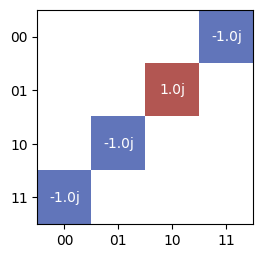

In [6]:
tq.plot_mat(sim.operator(circuit).mat())

In [7]:
circuit.results

Results({}, dim=None)

In [8]:
sim.run(circuit, n_shots=100)
circuit.results

Results({'11': 100})

In [9]:
results = sim.sample(circuit, n_shots=100)
results

Results({'11': 100})

In [10]:
sim.run(circuit, n_shots=np.inf, overwrite=True)
circuit.results

Results({'11': 1.0})

In [11]:
# Add an overrotation noise, which causes single qubit gates to be simulated as U^1.02
sim.add_overrotation(single_sys=0.02)

# Add a depolarizing noise source at a rate of 0.8% per acted-on qubit per cycle
sim.add_depolarizing(p=0.008)

# Note that noisy simulators can be constructed as one-liners
other_sim = tq.Simulator().add_overrotation(single_sys=0.02).add_depolarizing(p=0.008)

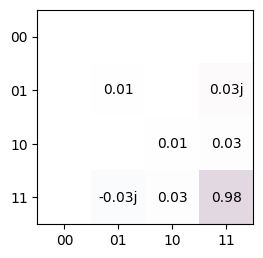

In [12]:
tq.plot_mat(sim.state(circuit).mat())

In [13]:
sim.run(circuit, n_shots=100, overwrite=True)
circuit.results

Results({'11': 100})